Use nouns:
> In previous
work (Hu and Liu, 2004; Xu et al., 2013), the
main assumption has been that nouns that are frequently modified by sentiment-bearing adjectives
(e.g., good, bad, ugly) are likely to be aspect nouns.<br>
We experimented with this notion and devised a
labeling strategy in which aspects are extracted
based on their co-occurrence with seed adjectives. <br>
However, during experimentation we found that for
the datasets in this paper, the most frequent nouns
were already good aspects; any further constraint
led to far worse performance on the development
set.<br> This means that our method only needs a POS
tagger to recognize nouns, not a full-fledged parser. <br>
~https://aclanthology.org/2020.acl-main.290.pdf

In [13]:
import networkx

threshold = 0.7
graph = networkx.Graph()

In [14]:
# embedding_path = '../output/310k-default-config/word2vec.model'
# embedding_path = '../output/80k-default-config/word2vec.model'
embedding_path = '../output/80k-noun-config/word2vec.model'

In [15]:
from main.embedding import Word2VecWrapper

# Use a word2vec base model. We use the same as one seen for ABE as a starting point.
word2vec = Word2VecWrapper.from_existing(embedding_path).model

In [16]:
top_n = 30

wv = word2vec.wv

for word in wv.index_to_key:
    for similar, score in wv.most_similar(word, topn=top_n):
        score >= threshold and graph.add_edge(word, similar, sim=score)

D:\PycharmProjects\nlp-course-project\.venv\Lib\site-packages\gensim\models\keyedvectors.py:449: RuntimeWarning: invalid value encountered in divide
  result = self.vectors[index] / self.norms[index]
D:\PycharmProjects\nlp-course-project\.venv\Lib\site-packages\gensim\models\keyedvectors.py:849: RuntimeWarning: invalid value encountered in divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


In [17]:
graph.nodes

NodeView(('player', 'count', 'card', 'effect', 'pile', 'time', 'minute', 'impression', 'repeat', 'couple', 'flaw', 'downside', 'play', 'edit', 'length', 'hour', 'fun', 'simple', 'expectation', 'appeal', 'rule', 'book', 'rulebook', 'paragraph', 'theme', 'design', 'artwork', 'integration', 'cartoony', 'fantasy', 'action', 'selection', 'bonus', 'move', 'currency', 'key', 'opportunity', 'vps', 'display', 'turn', 'wheel', 'column', 'row', 'cost', 'chain', 'option', 'build', 'income', 'round', 'point', 'salad', 'end', 'path', 'good', 'order', 'phase', 'car', 'start', 'advantage', 'result', 'plan', 'downtime', 'noble', 'position', 'thing', 'objective', 'beginning', 'situation', 'mistake', 'dice', 'rolling', 'roll', 'mitigation', 'die', 'write', 'randomness', 'attack', 'tile', 'pagoda', 'layer', 'claim', 'habitat', 'animal', 'strategy', 'planning', 'factor', 'expansion', 'base', 'stand', 'people', 'crowd', 'group', 'analysis', 'evening', 'negotiation', 'week', 'knowledge', 'laugh', 'luck', 'dr

## Visualization

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [19]:
import numpy as np

tsne = TSNE(n_components=2, perplexity=6)
m = []
for word in list(graph.nodes)[:100]:
    v = wv.get_vector(word)
    m.append(v)
X = tsne.fit_transform(np.array(m))

D:\PycharmProjects\nlp-course-project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Das System kann die angegebene Datei nicht finden
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\PycharmProjects\nlp-course-project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\jacop\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jacop\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users

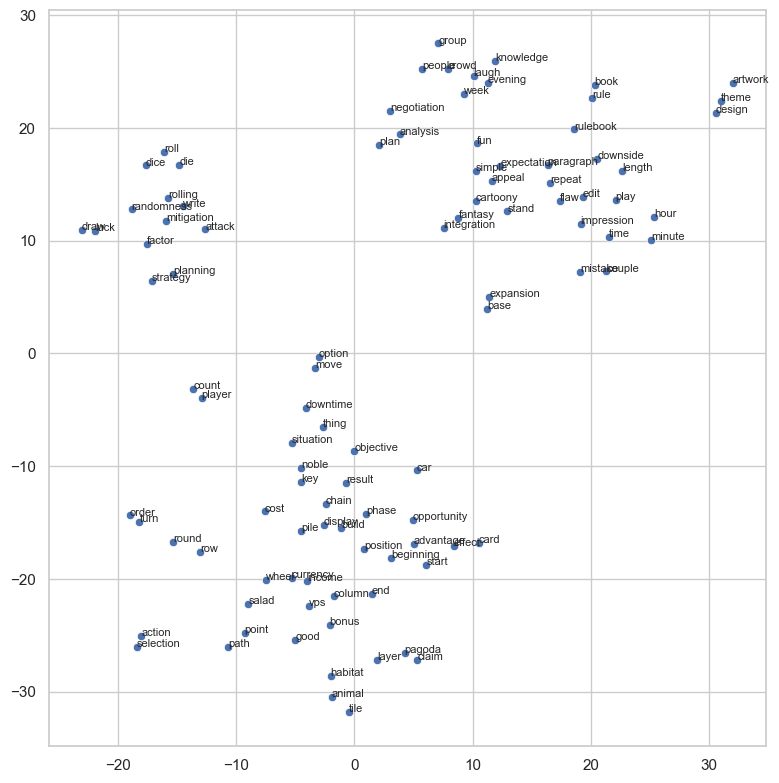

In [20]:
fig, ax = plt.subplots(figsize=(8, 8), ncols=1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax)
for j, w in enumerate(list(graph.nodes)[:100]):
    ax.text(X[j][0], X[j][1], w, fontsize=8)
plt.tight_layout()
plt.show()

## Graph Community Detection
Experiment some algorithms: https://networkx.org/documentation/stable/reference/algorithms/community.html

In [45]:
# Check: https://networkx.org/documentation/stable/reference/algorithms/community.html

In [21]:
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(graph)

for community in communities:
    print(list(community)[:top_n])
    len(community) > top_n and print("and more...")

['competition', 'return', 'population', 'downtime', 'dike', 'outpost', 'fight', 'delivery', 'coffee', 'aesthetic', 'result', 'hand', 'success', 'race', 'majority', 'road', 'position', 'care', 'range', 'park', 'dragon', 'videogame', 'example', 'marble', 'turn', 'galaxy', 'grab', 'minimum', 'feature', 'stone']
and more...
['rulebook', 'today', 'immersion', 'leg', 'dollar', 'floor', 'etc', 'companion', 'pandemic', 'love', 'failure', 'chest', 'child', 'conversation', 'product', 'cardboard', 'boy', 'app', 'weight', 'envelope', 'squad', 'pirate', 'preference', 'throat', 'theming', 'rate', 'manual', 'repeat', 'sandbox', 'sticker']
and more...
['energy', 'occasion', 'hope', 'analysis', 'y', 'chaos', 'excitement', 'kind', 'deal', 'decision', 'upkeep', 'nuance', 'negotiation', 'mile', 'paralysis', 'making', 'thought', 'affair', 'essence', 'eye', 'killer']
['deck', 'variability', 'encounter', 'replayability', 'item', 'setup', 'mini', 'zombie', 'quest', 'change', 'hero', 'variety', 'plenty', 'mons

In [24]:
wv.most_similar("deck")

[('zombie', 0.7264651656150818),
 ('equipment', 0.6849894523620605),
 ('discard', 0.67046058177948),
 ('x', 0.6568827629089355),
 ('builder', 0.6366450786590576),
 ('deckbuilder', 0.6362317204475403),
 ('weapon', 0.6207118630409241),
 ('deckbuilding', 0.6166225671768188),
 ('initiative', 0.6101635694503784),
 ('pile', 0.6041052937507629)]

In [28]:
from networkx.algorithms.community import label_propagation_communities

communities = label_propagation_communities(graph)

for community in communities:
    print(list(community)[:top_n])
    len(community) > top_n and print("and more...")

['surprise', 'league', 'evolution', 'university', 'aesthetic', 'preference', 'advantage', 'worker', 'son', 'count', 'confusion', 'marble', 'cash', 'text', 'crap', 'sequence', 'man', 'color', 'sum', 'hour', 'empire', 'service', 'ttr', 'period', 'week', 'mm', 'complaint', 'gaming', 'movement', 'year']
and more...


Now that we recognized the aspects (manually partition them) we just have to discriminate the sentences to see what they fit most.

In [74]:
# Todo organize these
aspects = {
    "luck": ["dice", "coin"],
    "bookkeeping": ["resource", "plan", "ahead"],
    "downtime": ["plan", "ap", "paralysis"],
    "interaction": ["trade", "offer", "plot", "plan"],
    "bash_leader": ["plot", "attack", "track"],
    "complicated-complex": ["easy", "rules", "tough"]
}

In [98]:
from collections import defaultdict


# A pretty naive approach. We use the existing model to partition the words to identify aspects. What are the main drawbacks?
# Firstly we have no way to focus more on some elements of sentence (everything is of same importance, ABAE not) and also we loose context.
# Secondly the embeddings are actually fixed already so while the communities are set their spatial positioning might be a problem in
# identifying some aspect categories.
def classify(pre_processed_text: list[str]):
    aspect_scores = defaultdict(float)
    for token in pre_processed_text:
        if not token in wv.key_to_index:
            continue

        for aspect, keywords in aspects.items():
            # Take the highest similarity
            aspect_scores[aspect] += max([wv.similarity(token, kw) for kw in keywords])

    return max(aspect_scores, key=aspect_scores.get, default="unknown"), aspect_scores

In [113]:
classify("go".split(" "))

('bookkeeping',
 defaultdict(float,
             {'luck': 0.05669749528169632,
              'bookkeeping': 0.7239496111869812,
              'downtime': 0.6392548680305481,
              'interaction': 0.6392548680305481,
              'bash_leader': 0.49538248777389526,
              'complicated-complex': 0.585917592048645}))

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Silhoutte score evaluation
# Extract Word2Vec embeddings for clustering evaluation
X = np.array([word2vec[word] for word in words if word in word2vec])

# Compute Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")


In [ ]:
# todo: Potremmo provare qualcosa del genere
import networkx as nx
import numpy as np
from community import community_louvain
from gensim.models import KeyedVectors
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Load pre-trained Word2Vec model (Google News or custom)
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Define words (example)
words = ["food", "taste", "service", "waiter", "ambiance", "decor", "price", "cost"]

# Build Graph with Word2Vec similarity
G = nx.Graph()
for word in words:
    if word in model:
        G.add_node(word, vec=model[word])

for i in range(len(words)):
    for j in range(i+1, len(words)):
        if words[i] in model and words[j] in model:
            sim = model.similarity(words[i], words[j])
            if sim > 0.5:  # Threshold for strong connections
                G.add_edge(words[i], words[j], weight=sim)

# Apply Louvain Community Detection
partition = community_louvain.best_partition(G)

# Convert clusters into numerical labels
labels = np.array([partition[word] for word in words])